In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from math import floor,ceil
import matplotlib.dates as mdates
import datetime

In [79]:
df = pd.read_csv('./Data/Storico/clean_dataset.csv', index_col= 0)
df.head(50)

print len(set(df['arr_city_name']))

1362


In [62]:
len(df)

8945

In [80]:
df.loc[df['country_code'] == 'IT',['provincia','country_code']].drop_duplicates(subset = ['provincia','country_code'])

,provincia,country_code
0,Ancona,IT
1,Aosta,IT
2,Monza-Brianza,IT
3,Ascoli Piceno,IT
4,Lecco,IT
6,Bergamo,IT
9,Bologna,IT
10,Brescia,IT
12,Novara,IT
13,Caserta,IT


In [64]:
df.set_value(df['provincia'] == 'Siracusa', 'country_code', 'IT')

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.000000,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.000000,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.000000,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.000000,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.000000,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT
5,2017-01-01,belfort,413.000000,47.639674,6.863849,2,2,5,22,19200,Undefined,Undefined,FR
6,2017-01-01,bergamo,49.500000,45.698264,9.677270,5,7,5,2,4200,Bergamo,Lombardia,IT
7,2017-01-01,berna,355.000000,46.948034,7.447218,2,3,1,19,17400,Undefined,Undefined,CH
8,2017-01-01,bludenz,300.000000,47.159910,9.808210,2,2,0,16,15000,Undefined,Undefined,AT
9,2017-01-01,bologna,215.636364,44.505880,11.343371,22,34,12,11,10200,Bologna,Emilia-Romagna,IT


In [65]:
df.set_value(df['provincia'] == 'Bozen', 'provincia', 'Bolzano')

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.000000,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.000000,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.000000,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.000000,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.000000,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT
5,2017-01-01,belfort,413.000000,47.639674,6.863849,2,2,5,22,19200,Undefined,Undefined,FR
6,2017-01-01,bergamo,49.500000,45.698264,9.677270,5,7,5,2,4200,Bergamo,Lombardia,IT
7,2017-01-01,berna,355.000000,46.948034,7.447218,2,3,1,19,17400,Undefined,Undefined,CH
8,2017-01-01,bludenz,300.000000,47.159910,9.808210,2,2,0,16,15000,Undefined,Undefined,AT
9,2017-01-01,bologna,215.636364,44.505880,11.343371,22,34,12,11,10200,Bologna,Emilia-Romagna,IT


In [66]:
df.set_value(df['provincia'] == 'Mendrisio', 'country_code', 'CH')

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.000000,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.000000,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.000000,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.000000,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.000000,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT
5,2017-01-01,belfort,413.000000,47.639674,6.863849,2,2,5,22,19200,Undefined,Undefined,FR
6,2017-01-01,bergamo,49.500000,45.698264,9.677270,5,7,5,2,4200,Bergamo,Lombardia,IT
7,2017-01-01,berna,355.000000,46.948034,7.447218,2,3,1,19,17400,Undefined,Undefined,CH
8,2017-01-01,bludenz,300.000000,47.159910,9.808210,2,2,0,16,15000,Undefined,Undefined,AT
9,2017-01-01,bologna,215.636364,44.505880,11.343371,22,34,12,11,10200,Bologna,Emilia-Romagna,IT


In [67]:
df.set_value(df['provincia'] == 'Općina Zadar', 'country_code', 'HR')

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.000000,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.000000,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.000000,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.000000,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.000000,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT
5,2017-01-01,belfort,413.000000,47.639674,6.863849,2,2,5,22,19200,Undefined,Undefined,FR
6,2017-01-01,bergamo,49.500000,45.698264,9.677270,5,7,5,2,4200,Bergamo,Lombardia,IT
7,2017-01-01,berna,355.000000,46.948034,7.447218,2,3,1,19,17400,Undefined,Undefined,CH
8,2017-01-01,bludenz,300.000000,47.159910,9.808210,2,2,0,16,15000,Undefined,Undefined,AT
9,2017-01-01,bologna,215.636364,44.505880,11.343371,22,34,12,11,10200,Bologna,Emilia-Romagna,IT


In [68]:
df.set_value(df['provincia'] == 'Greater London', 'country_code', 'GB')

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.000000,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.000000,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.000000,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.000000,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.000000,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT
5,2017-01-01,belfort,413.000000,47.639674,6.863849,2,2,5,22,19200,Undefined,Undefined,FR
6,2017-01-01,bergamo,49.500000,45.698264,9.677270,5,7,5,2,4200,Bergamo,Lombardia,IT
7,2017-01-01,berna,355.000000,46.948034,7.447218,2,3,1,19,17400,Undefined,Undefined,CH
8,2017-01-01,bludenz,300.000000,47.159910,9.808210,2,2,0,16,15000,Undefined,Undefined,AT
9,2017-01-01,bologna,215.636364,44.505880,11.343371,22,34,12,11,10200,Bologna,Emilia-Romagna,IT


In [69]:
df.set_value(df['provincia'] == 'Maloja', 'country_code', 'CH')

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.000000,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.000000,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.000000,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.000000,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.000000,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT
5,2017-01-01,belfort,413.000000,47.639674,6.863849,2,2,5,22,19200,Undefined,Undefined,FR
6,2017-01-01,bergamo,49.500000,45.698264,9.677270,5,7,5,2,4200,Bergamo,Lombardia,IT
7,2017-01-01,berna,355.000000,46.948034,7.447218,2,3,1,19,17400,Undefined,Undefined,CH
8,2017-01-01,bludenz,300.000000,47.159910,9.808210,2,2,0,16,15000,Undefined,Undefined,AT
9,2017-01-01,bologna,215.636364,44.505880,11.343371,22,34,12,11,10200,Bologna,Emilia-Romagna,IT


In [77]:
df.set_value(df['provincia'] == 'Isère', 'country_code', 'FR')

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.000000,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.000000,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.000000,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.000000,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.000000,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT
5,2017-01-01,belfort,413.000000,47.639674,6.863849,2,2,5,22,19200,Undefined,Undefined,FR
6,2017-01-01,bergamo,49.500000,45.698264,9.677270,5,7,5,2,4200,Bergamo,Lombardia,IT
7,2017-01-01,berna,355.000000,46.948034,7.447218,2,3,1,19,17400,Undefined,Undefined,CH
8,2017-01-01,bludenz,300.000000,47.159910,9.808210,2,2,0,16,15000,Undefined,Undefined,AT
9,2017-01-01,bologna,215.636364,44.505880,11.343371,22,34,12,11,10200,Bologna,Emilia-Romagna,IT


In [78]:
df.to_csv('./Data/Storico/clean_dataset.csv')

In [70]:
# passaggi da Milano verso l'Italia
ita = df[df['country_code'] == 'IT']
print len(ita)

7784


In [71]:
# passaggi da Milano verso estero
est = df[df['country_code'] != 'IT']
print len(est)

1161


In [72]:
# numero di province presenti nel dataset
print len(set(ita['provincia']))

# numero stati esteri
print len(set(est['country_code']))

97
23


In [73]:
ita.head(50)

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.000000,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.000000,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.000000,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.000000,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.000000,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT
6,2017-01-01,bergamo,49.500000,45.698264,9.677270,5,7,5,2,4200,Bergamo,Lombardia,IT
9,2017-01-01,bologna,215.636364,44.505880,11.343371,22,34,12,11,10200,Bologna,Emilia-Romagna,IT
10,2017-01-01,brescia,97.000000,45.541553,10.211802,11,16,8,5,5400,Brescia,Lombardia,IT
12,2017-01-01,cascina malpensa,64.000000,45.715643,8.591000,2,2,0,3,4200,Novara,Piemonte,IT
13,2017-01-01,caserta,748.000000,41.072348,14.331134,2,2,0,41,29400,Caserta,Campania,IT


In [39]:
# Define a dictionary with the functions to apply for a given column:
f = {'fullseats': 'sum', 'seatsleft': 'sum', 'distance':'mean','arr_lat':'mean',
     'arr_long':'mean','recommended_price':'mean'}

prov_data = ita.groupby(['regione','provincia','dep_day']).agg(f)

In [15]:
prov_data.head()

distance  seatsleft  recommended_price  \
regione provincia dep_day                                              
Abruzzo Chieti    2017-01-09     589.0          2               32.0   
                  2017-01-17     591.0          2               32.0   
                  2017-01-27     590.0          5               32.0   
                  2017-02-01     591.0          3               32.0   
                  2017-02-05     651.0          2               35.0   

                                arr_lat  fullseats   arr_long  
regione provincia dep_day                                      
Abruzzo Chieti    2017-01-09  42.347886          0  14.163585  
                  2017-01-17  42.347886          0  14.163585  
                  2017-01-27  42.366424          1  14.154416  
                  2017-02-01  42.347882          0  14.163603  
                  2017-02-05  42.104559          0  14.705871

In [17]:
prova = prov_data[prov_data.index.get_level_values('provincia') == 'Chieti']

In [19]:
prova = prova.reset_index()

,regione,provincia,dep_day,distance,seatsleft,recommended_price,arr_lat,fullseats,arr_long
0,Abruzzo,Chieti,2017-01-09,589.0,2,32.0,42.347886,0,14.163585
1,Abruzzo,Chieti,2017-01-17,591.0,2,32.0,42.347886,0,14.163585
2,Abruzzo,Chieti,2017-01-27,590.0,5,32.0,42.366424,1,14.154416
3,Abruzzo,Chieti,2017-02-01,591.0,3,32.0,42.347882,0,14.163603
4,Abruzzo,Chieti,2017-02-05,651.0,2,35.0,42.104559,0,14.705871
5,Abruzzo,Chieti,2017-02-17,624.0,2,33.5,42.259871,3,14.502340
6,Abruzzo,Chieti,2017-02-22,595.0,4,32.0,42.347886,0,14.163585
7,Abruzzo,Chieti,2017-03-10,590.0,2,32.0,42.341484,1,14.161624
8,Abruzzo,Chieti,2017-03-19,654.0,2,32.0,42.033443,0,14.379191


In [35]:
x = pd.to_datetime(prova['dep_day'])
y = prova['seatsleft'] + prova['fullseats']

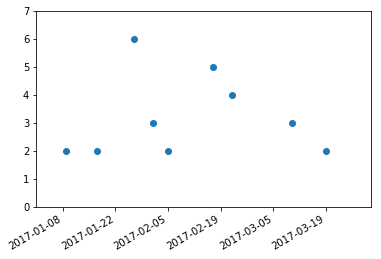

In [41]:
fig, ax = plt.subplots()

plt.gca().plot_date(x, y)
plt.gcf().autofmt_xdate()
plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
plt.gca().set_ylim([0, 7])

plt.show()

In [40]:
index = sorted(set(prov_data.index.get_level_values('provincia')))
cols = pd.date_range(start = datetime.date(2017, 1, 1), end = datetime.date(2017, 3, 31), freq='D')

In [41]:
df_ = pd.DataFrame(index=index, columns=cols)
df_ = df_.fillna(0) # with 0s rather than NaNs

In [42]:
df_.head()

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00
Alessandria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ancona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aosta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arezzo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ascoli Piceno,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
for ind, row in prov_data.iterrows():
    prov = row.name[1]
    data = row.name[2]
    
    value = int(row['seatsleft'] + row['fullseats'])
    df_.set_value(df_.index == prov, data, value)

In [86]:
df_.head()

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00
Alessandria,0,0,3,6,15,18,3,14,8,8,...,3,5,11,3,0,10,4,7,12,0
Ancona,6,19,0,15,24,14,13,29,14,8,...,4,12,47,2,13,7,3,3,8,0
Aosta,17,15,2,10,25,44,15,6,0,3,...,0,7,17,26,0,0,11,3,9,0
Arezzo,0,2,0,3,0,0,0,3,2,3,...,0,0,8,2,4,3,0,0,0,0
Ascoli Piceno,2,0,3,0,6,3,0,0,0,2,...,0,5,0,0,0,6,4,0,9,0


In [43]:
# aggiungi regione
df_['regione'] = ''

prov = list(prov_data.index.get_level_values('provincia'))
reg = list(prov_data.index.get_level_values('regione'))

provreg = set(zip(prov,reg))
d = dict(provreg)

for ind, row in df_.iterrows():
    prov = row.name
    df_.set_value(ind, 'regione', d[prov])
    

In [44]:
cols = df_.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_ = df_[cols]

In [45]:
df_.head(8)

,regione,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,...,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00
Alessandria,Piemonte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ancona,Marche,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aosta,Valle d'Aosta,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arezzo,Toscana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ascoli Piceno,Marche,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asti,Piemonte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Avellino,Campania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bari,Puglia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
dfplot = df_.reset_index()
dfplot = dfplot.rename(columns = {'index':'provincia'})

#print dfplot.head()
prova = dfplot.groupby(['regione','provincia']).first()

In [47]:
len(dfplot)

98

In [48]:
print set(dfplot['regione'])

set(['Veneto', 'Umbria', 'Toscana', 'Calabria', 'Molise', 'Liguria', 'Abruzzo', 'Trentino-Alto Adige', 'Basilicata', "Valle d'Aosta", 'Marche', 'Friuli-Venezia Giulia', 'Undefined', 'Lazio', 'Campania', 'Graub\xc3\xbcnden', 'Sicilia', 'Puglia', 'Lombardia', 'Emilia-Romagna', 'England', 'Piemonte'])


In [210]:
veneto = dfplot[dfplot['regione'] == 'Veneto'].reset_index(drop = True)

veneto

,provincia,regione,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,...,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00
0,Belluno,Veneto,0,0,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Padova,Veneto,14,42,29,11,31,20,21,30,...,15,18,76,23,32,0,8,3,15,0
2,Rovigo,Veneto,6,3,0,0,0,2,0,0,...,0,0,11,0,0,4,0,0,0,0
3,Treviso,Veneto,8,8,0,8,32,0,0,0,...,5,2,34,3,13,6,6,0,6,0
4,Venezia,Veneto,4,10,7,0,19,7,6,17,...,6,0,21,5,4,5,6,12,0,0
5,Verona,Veneto,31,30,26,19,37,21,31,34,...,19,9,78,31,24,22,13,10,37,0
6,Vicenza,Veneto,9,6,12,0,25,21,8,18,...,12,21,54,20,14,10,2,6,11,0


In [200]:
cols = veneto.columns.tolist()[2:]
x = pd.to_datetime(cols)

0


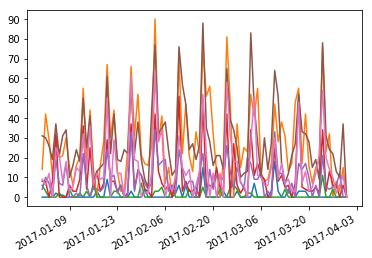

In [209]:
from matplotlib.ticker import MaxNLocator

for i in xrange(len(veneto)):
    y = veneto.loc[i, cols]
    plt.gca().plot_date(x, y, '-')
    plt.gcf().autofmt_xdate()
    #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
    #plt.gca().set_ylim([0, 7])
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [213]:
for reg in  set(dfplot['regione']):
    temp = dfplot[dfplot['regione'] == reg].reset_index(drop = True)
    cols = temp.columns.tolist()[2:]
    x = pd.to_datetime(cols)
    
    for i in xrange(len(temp)):
        y = temp.loc[i, cols]
        plt.gca().plot_date(x, y, '-')
        plt.gcf().autofmt_xdate()
        #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
        #plt.gca().set_ylim([0, 7])
        plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    filename = reg+'.png'
    plt.savefig(filename)
    plt.clf()


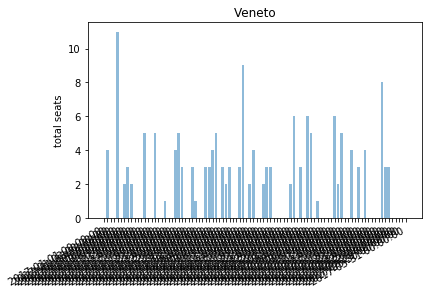

In [216]:
#import plt.rcdefaults()

 
objects = x
y_pos = np.arange(len(objects))
performance = y
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('total seats')
plt.title('Veneto')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gcf().autofmt_xdate()

plt.show()


In [282]:
# per ogni regione seleziona la città con più passaggi
dfplot.head()

collist = list(dfplot)
print collist
collist.remove('provincia')
collist.remove('regione')

dfplot['totaltrips'] = dfplot[collist].sum(axis=1)
                                           
top = dfplot.sort_values(by = 'totaltrips', ascending=False).groupby('regione', as_index=False).first()

['provincia', 'regione', Timestamp('2017-01-01 00:00:00', freq='D'), Timestamp('2017-01-02 00:00:00', freq='D'), Timestamp('2017-01-03 00:00:00', freq='D'), Timestamp('2017-01-04 00:00:00', freq='D'), Timestamp('2017-01-05 00:00:00', freq='D'), Timestamp('2017-01-06 00:00:00', freq='D'), Timestamp('2017-01-07 00:00:00', freq='D'), Timestamp('2017-01-08 00:00:00', freq='D'), Timestamp('2017-01-09 00:00:00', freq='D'), Timestamp('2017-01-10 00:00:00', freq='D'), Timestamp('2017-01-11 00:00:00', freq='D'), Timestamp('2017-01-12 00:00:00', freq='D'), Timestamp('2017-01-13 00:00:00', freq='D'), Timestamp('2017-01-14 00:00:00', freq='D'), Timestamp('2017-01-15 00:00:00', freq='D'), Timestamp('2017-01-16 00:00:00', freq='D'), Timestamp('2017-01-17 00:00:00', freq='D'), Timestamp('2017-01-18 00:00:00', freq='D'), Timestamp('2017-01-19 00:00:00', freq='D'), Timestamp('2017-01-20 00:00:00', freq='D'), Timestamp('2017-01-21 00:00:00', freq='D'), Timestamp('2017-01-22 00:00:00', freq='D'), Timesta

In [283]:
top

,regione,provincia,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,...,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00,totaltrips
0,Abruzzo,Pescara,0,0,0,2,6,4,5,0,...,5,0,0,0,0,0,1,0,0,192
1,Auvergne-Rhône-Alpes,Isère,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,Basilicata,Potenza,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,10
3,Calabria,Reggio Calabria,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,8
4,Campania,Napoli,0,0,0,4,6,0,0,7,...,0,5,0,4,0,3,3,0,0,150
5,Emilia-Romagna,Bologna,34,44,17,27,42,60,34,78,...,39,84,77,72,40,18,36,47,0,4883
6,England,Greater London,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,Friuli-Venezia Giulia,Udine,7,0,2,5,7,8,0,18,...,17,14,2,4,0,0,0,11,0,524
8,Graubünden,Maloja,0,0,0,0,5,0,0,0,...,3,5,0,0,0,0,0,0,0,75
9,Lazio,Roma,8,24,9,14,13,19,5,37,...,4,25,20,19,7,6,0,8,0,1018


In [273]:
top.drop(top.index[[1,6,8,17,21,24]], inplace = True)

In [274]:
top.sort_values(by = 'totaltrips', ascending = True, inplace = True)

In [275]:
top.reset_index(drop = True, inplace = True)

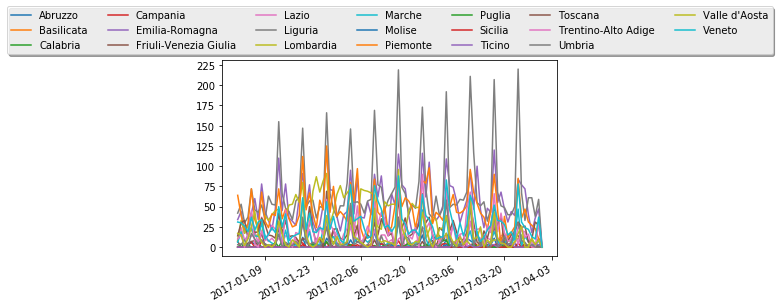

In [254]:
cols = top.columns.tolist()[2:]
cols = cols[:len(cols)-1]
x = pd.to_datetime(cols)
    
for i in xrange(len(top)):
    y = top.loc[i, cols]
    plt.gca().plot_date(x, y, '-', label = top.loc[i,'regione'])
    plt.gcf().autofmt_xdate()
    #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
    #plt.gca().set_ylim([0, 7])
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=7, fancybox=True, shadow=True)
    
plt.show()

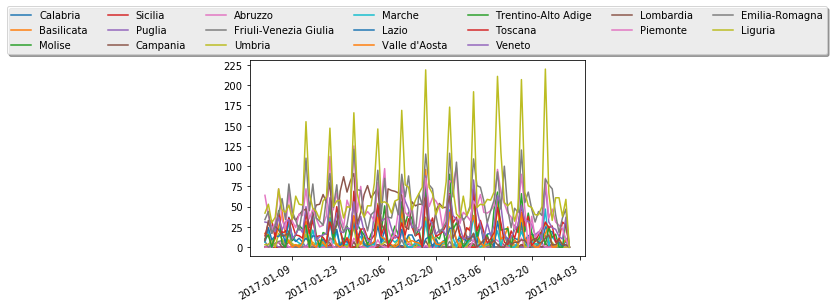

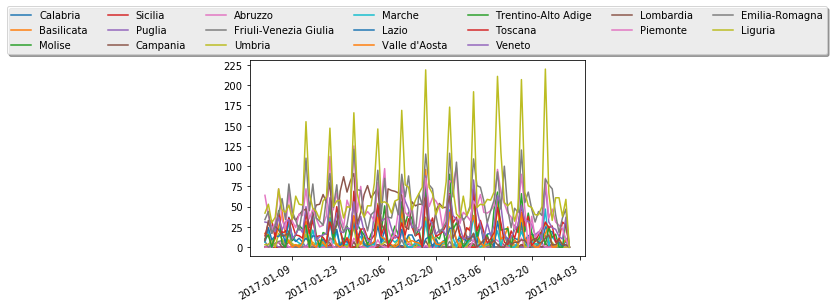

In [276]:
%matplotlib inline
import time
from IPython import display

for i in xrange(len(top)):
    y = top.loc[i, cols]
    plt.gca().plot_date(x, y, '-', label = top.loc[i,'regione'])
    plt.gcf().autofmt_xdate()
    #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
    #plt.gca().set_ylim([0, 7])
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=7, fancybox=True, shadow=True)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)    

In [269]:
top

,regione,provincia,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,...,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00,totaltrips
0,Calabria,Reggio Calabria,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,56
1,Basilicata,Potenza,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,70
2,Molise,Campobasso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91
3,Sicilia,Catania,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,133
4,Ticino,Mendrisio,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,0,392
5,Puglia,Bari,0,4,0,3,0,0,0,0,...,0,0,0,0,0,0,0,3,0,721
6,Campania,Napoli,0,0,0,4,6,0,0,7,...,0,5,0,4,0,3,3,0,0,1050
7,Abruzzo,Pescara,0,0,0,2,6,4,5,0,...,5,0,0,0,0,0,1,0,0,1344
8,Friuli-Venezia Giulia,Udine,7,0,2,5,7,8,0,18,...,17,14,2,4,0,0,0,11,0,3668
9,Umbria,Perugia,3,3,9,0,17,10,4,9,...,22,30,8,6,0,3,0,0,0,5425


In [284]:
lomb = dfplot[dfplot['regione'] == 'Lombardia'].reset_index(drop = True)
lomb

,provincia,regione,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,...,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00,totaltrips
0,Bergamo,Lombardia,10,30,16,33,28,27,10,9,...,34,41,27,9,38,25,28,38,0,2671
1,Brescia,Lombardia,35,22,24,17,13,12,19,27,...,13,66,11,29,27,16,19,13,0,2421
2,Como,Lombardia,3,11,11,16,12,7,14,12,...,3,0,5,3,10,0,7,0,0,614
3,Cremona,Lombardia,0,0,0,0,3,3,6,3,...,5,0,3,6,0,3,0,0,0,205
4,Lecco,Lombardia,3,4,12,11,11,4,0,0,...,7,4,0,3,2,0,0,0,0,521
5,Lodi,Lombardia,0,0,3,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,112
6,Mantova,Lombardia,0,0,2,0,0,2,0,2,...,0,3,0,5,0,0,0,3,0,87
7,Milano,Lombardia,8,33,17,26,21,14,15,17,...,6,11,15,3,3,9,3,3,0,2887
8,Monza-Brianza,Lombardia,10,4,4,7,11,7,10,13,...,0,0,0,0,0,3,0,0,0,398
9,Pavia,Lombardia,3,9,9,9,13,7,0,4,...,8,8,2,0,2,2,2,2,0,765


In [ ]:
lomb = dfplot[dfplot['regione'] == 'Lombardia'].reset_index(drop = True)
cols = lomb.columns.tolist()[2:]
x = pd.to_datetime(cols)
    
    for i in xrange(len(temp)):
        y = temp.loc[i, cols]
        plt.gca().plot_date(x, y, '-')
        plt.gcf().autofmt_xdate()
        #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
        #plt.gca().set_ylim([0, 7])
        plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    filename = reg+'.png'
    plt.savefig(filename)
    plt.clf()
